In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Initialize 10 worlds according to uniform distribution with 1 particle in 1D each.
X = InitializeWorlds('uniform', 10, 1, 1)
# InterworldPotential1D(X)

it = range(100)
#Scale for now is a scaling factor while I figure out what that should look like.
scale = 100

#### Run this a few times to see how unstable the MIW potential is. Extremely sensitive to initial conditions for a uniform sampling.

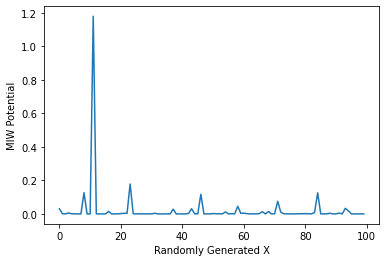

In [30]:
# Create and compute potential for 100 N=10, J=D=1 worlds, plotted.
pot = []
for i in it:
    X = InitializeWorlds('uniform', 10, 1, 1)
    pot.append(InterworldPotential1D(X*scale))
plt.ylabel("MIW Potential")
plt.xlabel("Randomly Generated X")
plt.plot(it, pot);


### Dynamics examples for MIW with no external potential

$N = $ Number of worlds

$J = $ Number of particles/world

$D = $ spatial dim particles are in

Steps/seconds provide stopping criteria, and $to$ is initial step size (code adapts for problematic configurations).

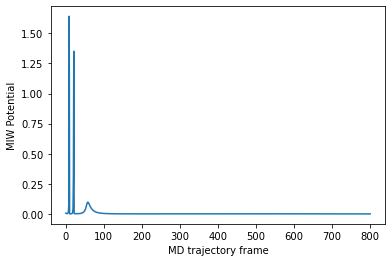

In [68]:
P = 'uniform'
N = 5
J = 1
D = 1
steps = 200
to = 1
seconds = 80

#Extract trajectory and potentials, creates traj.xyz for view in visualizer.
#Ensure a reasonably viewable output (i.e. system doesn't blow up) with while loop.
pots = [11]
while max(pots) > 10:
    traj, pots = runMD(P, N, J, D, steps, to, seconds, 0);
    xs = np.arange(0,len(pots))
plt.ylabel("MIW Potential")
plt.xlabel("MD trajectory frame")
plt.plot(xs, pots)

Traj2XYZ(traj, D)

## Some nice oscillations

This required a lot of playing with parameters, and so it likely will not work depending on what k is. Set back to .001 or so for reasonable output here. 

[[-4.84201189]
 [-3.1200553 ]
 [-2.03307407]
 [-1.12955474]
 [-0.27256568]
 [ 0.63095365]
 [ 1.71793488]
 [ 3.43989147]]


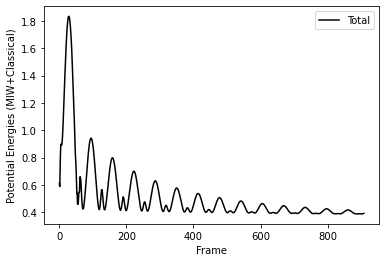

In [61]:
P = 'uniform'
N = 8
J = 1
D = 1
X = np.zeros((N,1))
start = -.5
for ind, world in enumerate(X):
    X[ind][0] = start
    start += .1
to = .2
seconds = 200
pots = [0]
#while max(pots) > 1e8 or max(pots) < 100:
traj, pots, MIWpots, classpots = runMD_X(X, HarmonicPotential, HarmonicForces, steps, to, seconds)
xs = np.arange(0,len(pots))
plt.plot(xs, pots, color = 'black', label = "Total")
#plt.plot(xs, classpots, color='red', label = "Classical")
#plt.plot(xs, MIWpots, color = 'blue', label = "MIW")
plt.xlabel("Frame")
plt.ylabel("Potential Energies (MIW+Classical)")
plt.legend()
plt.savefig("Oscillation.pdf")

Traj2XYZ(traj, D)

## MD Minimization Scheme

[[-4.4069028 ]
 [-2.80282129]
 [-1.82239842]
 [-1.03984843]
 [-0.3381482 ]
 [ 0.34068733]
 [ 1.04238757]
 [ 1.82493755]
 [ 2.80536042]
 [ 4.40944194]]


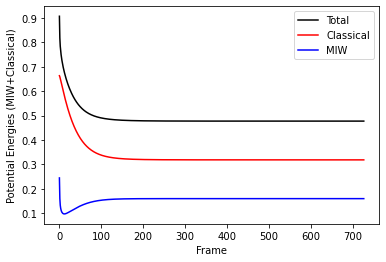

In [72]:
P = 'uniform'
N = 10
J = 1
D = 1
X = InitializeWorlds(P, N, J, D)
X -=.5
to = .5
seconds = 400
pots = [0]
#while max(pots) > 1e8 or max(pots) < 100:
traj, pots, MIWpots, classpots = runMD_X(X, HarmonicPotential, HarmonicForces, steps, to, seconds, mdmin = True)
xs = np.arange(0,len(pots))
plt.plot(xs, pots, color = 'black', label = "Total")
plt.plot(xs, classpots, color='red', label = "Classical")
plt.plot(xs, MIWpots, color = 'blue', label = "MIW")
plt.xlabel("Frame")
plt.ylabel("Potential Energies (MIW+Classical)")
plt.legend()
plt.savefig("MDmin.pdf")

Traj2XYZ(traj, D)

Comparison with analytic solution for k = .001, m = 1, varying N.

5000


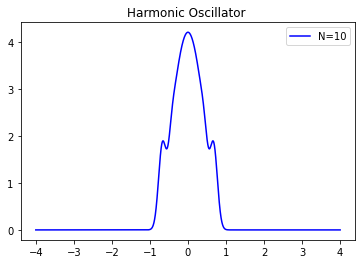

In [62]:
X4 = np.array([[-0.48129043],[-0.13677689],[ 0.13221115], [ 0.47672469]])
X5 = np.array([[-0.53277442],[-0.22185777],[-0.00200649],[ 0.21784478],[ 0.52876144]])
X6 = np.array([[-0.56967066],[-0.2804815 ],[-0.08681397],[ 0.08876434],[ 0.28243187],[ 0.57162103]])
X7 = np.array([[-6.03401213e-01],[-3.29696460e-01],[-1.52660639e-01],[-4.71992094e-04],[ 1.51716655e-01],[ 3.28752476e-01],[ 6.02457229e-01]])
X8 = np.array([[-0.62957676],[-0.36761654],[-0.20225473],[-0.06480288],[ 0.06557035],[ 0.2030222 ],[ 0.36838401],[ 0.63034423]])
X9 = np.array([[-6.52804377e-01],[-4.00146368e-01],[-2.43524538e-01],[-1.16340325e-01],[ 3.49634795e-04],[ 1.17039595e-01],[ 2.44223808e-01],[ 4.00845637e-01],[ 6.53503647e-01]])
X10 = np.array([[-0.67371198],[-0.42865997],[-0.27888292],[-0.15933448],[-0.05213727],[ 0.05156694],[ 0.15876414],[ 0.27831258],[ 0.42808963],[ 0.67314164]])

def wavefunction(X, minbound, maxbound, npts):
    sigma = .1
    N = 1/np.sqrt(np.pi*sigma)
    xs = np.linspace(minbound, maxbound, npts)
    wfc = np.zeros(xs.size)
    print(wfc.size)
    for ind, world in enumerate(X):
        for num, val in enumerate(xs):
            # 10 is used here because scaleX = 10 for all of those, so X's used were 10.
            wfc[num] += N * np.exp( - ( (xs[num] - X[ind][0])**2 / (2*sigma**2) ) )
    return(xs, wfc)

xs, wfc = wavefunction(X10, -4, 4, 5000)
plt.title("Harmonic Oscillator ")
plt.plot(xs, wfc, color = 'blue', label = 'N=10');
plt.legend()
plt.savefig("N=10.png")

In [55]:
# Compute interworld potential (D=J=1 case from 10.1103/PhysRevX.4.041013)
def InterworldPotential1D(X):
    
    N = len(X)
    K = len(X[0])
    s = 0
    
    #These parameters need to be passable, didn't have time to go back and change.
    # mp = 1836
    mp = 1
    C = 1/(8*mp)
    
    # Arbitrarily large number for the special cases where index \pm 1 isn't in X.
    infty = 1e10
    
    # Loop through summing MIW Interaction potential between worlds in X
    for index, world in enumerate(X):
        if len(world) == 1:
            # Edge cases are sent to  \pm infty.
            if index == 0:
                # Update for special case
                s+= pow((1/(X[index+1][0]-X[index][0]) - 1/(X[index][0]- (-infty)) ), 2)
            elif index == N-1:
                s+= pow((1/(infty-X[index][0]) - 1/(X[index][0]-X[index-1][0])), 2)

            # All other indices computed the standard way.
            else:
                s+= pow((1/(X[index+1][0]-X[index][0]) - 1/(X[index][0]-X[index-1][0])), 2)
        else:
            print("Potential not applicable for  JD > 1")
    s *= C   
    return(s)

# Note that this will only work for N > 4
# Can easily work with others, just not much of a point for casing it right now.
def InterWorldForces1D(X):
    # N, number of worlds, K=J*D particles, D = 1/4mp
    N = len(X)
    K = len(X[0])
    s = 0
    
    #mp = 1836
    mp = 1
    D = 1/(4*mp)
    infty = 1e10
    forces = np.zeros( (len(X), len(X[0])) )
    
    # Atomic Units, hbar = 1, ao = 1, me = 1 => mp  = 1836
    for index, world in enumerate(X):
        if len(world) == 1:
            
            # 0, 1, N-2, N-1 require special treatment to send OOB particles to +/- \infty.
            # Forces: 10.1103/PhysRevX.4.041013, Eq (25)
            if index == 0:
                SigN = ( (1/(pow((X[index][0] - (-infty)), 2)) )
                        *( 1/(X[index+1][0]-X[index][0]) - 2/(X[index][0]- (-infty)) 
                          + 0 ) 
                       )
                SigNplus1 = ( (1/(pow((X[index+1][0] - X[index][0]), 2)))
                        *( 1/(X[index+2][0]-X[index+1][0]) - 2/(X[index+1][0]-X[index][0]) 
                          + 1/(X[index][0]- (-infty) ) )
                       )
                forces[index][0] = D*(SigNplus1 - SigN)
                
            elif index == 1:
                SigN = ( (1/(pow((X[index][0] - X[index-1][0]), 2)) )
                        *( 1/(X[index+1][0]-X[index][0]) - 2/(X[index][0]-X[index-1][0]) 
                          + 1/(X[index-1][0]- (-infty) ) )
                       )
                SigNplus1 = ( (1/(pow((X[index+1][0] - X[index][0]), 2)))
                        *( 1/(X[index+2][0]-X[index+1][0]) - 2/(X[index+1][0]-X[index][0]) 
                          + 1/(X[index][0]-X[index-1][0]) )
                       )
                forces[index][0] = D*(SigNplus1 - SigN)

            elif index == N-1:   
                SigN = ( (1/(pow((X[index][0] - X[index-1][0]), 2)) )
                        *( 1/(infty-X[index][0]) - 2/(X[index][0]-X[index-1][0]) 
                          + 1/(X[index-1][0]-X[index-2][0]) )
                       )
                SigNplus1 = ( (1/(pow((infty - X[index][0]), 2)))
                        *( 0 - 2/(infty-X[index][0])
                          + 1/(X[index][0]-X[index-1][0]) )
                       )
                forces[index][0] = D*(SigNplus1 - SigN)
                
            elif index == N-2:
                SigN = ( (1/(pow((X[index][0] - X[index-1][0]), 2)) )
                        *( 1/(X[index+1][0]-X[index][0]) - 2/(X[index][0]-X[index-1][0]) 
                          + 1/(X[index-1][0]-X[index-2][0]) )
                       )
                SigNplus1 = ( (1/(pow((X[index+1][0] - X[index][0]), 2)))
                        *( 1/( infty -X[index+1][0]) - 2/(X[index+1][0]-X[index][0]) 
                          + 1/(X[index][0]-X[index-1][0]) )
                       )
                forces[index][0] = D*(SigNplus1 - SigN)
                
            # General case of the indices, i.e. nothing needs to be sent to \infty.
            else:
                SigN = ( (1/(pow((X[index][0] - X[index-1][0]), 2)) )
                        *( 1/(X[index+1][0]-X[index][0]) - 2/(X[index][0]-X[index-1][0]) 
                          + 1/(X[index-1][0]-X[index-2][0]) )
                       )
                SigNplus1 = ( (1/(pow((X[index+1][0] - X[index][0]), 2)))
                        *( 1/(X[index+2][0]-X[index+1][0]) - 2/(X[index+1][0]-X[index][0]) 
                          + 1/(X[index][0]-X[index-1][0]) )
                       )
                forces[index][0] = D*(SigNplus1 - SigN)
                
      
        
        else:
            print("Potential not applicable for  JD > 1")
            
    return(forces)


# For now just initialize according to some uniform distribution.
# P really should be passable as any map from RJD->R and sampled from that, add later.
def InitializeWorlds(P, N, J, D):
    # Check to make sure N J D are ints.
    if type(N)!= int or type(J)!= int or type(D)!= int:
        return("N, J, or D not an integer")

    if P == 'uniform':
        # scale/shift with simple elementwise ops on nparray.
        Y = np.random.rand(N, J*D)
        X = np.sort(Y, axis=0)
    if P != 'uniform':
        print('Not yet implemented')
    return(X)
        
# P = initial prob dist, N = # worlds, J = # Particles/world, D = spatial dim.,
# steps = steps to run, to = initial step size, seconds = md trajectory time.
# Broke something in here, and due to time constraint just made a runMD_X function.. fixing later.
def runMD(P, N, J, D, steps, to, seconds, Vext):
    # Compute initial config, velocities (0), forces, and things for step size.
    X = InitializeWorlds(P, N, J, D)
    V = np.zeros( (len(X), len(X[0])) )
    F = InterWorldForces1D(X)
    Fo = max(F)
    it = 0
    timer = 0
    dtmax = 10*to
    # Mass = 1 for now.
    m = 1 
    
    # This thing matters for now to tune interaction strength 
    scaleX = 50
    X = X*scaleX
    
    potentials = []
    traj = []
    
    while timer < seconds or it < steps:
        # Determine step size
        
        # Forces are too erratic for sturniolo's adaptive step. Diff adaptive step used.
        # dt = min([to*(Fo/max(F)), dtmax])
        dt = to
        
        
        # Update Potential/Trajectory
        potentials.append(InterworldPotential1D(X))
        traj.append(X)
        
        # There is no reason to have this.
        Xtemp = X.copy()
        
        #Initializes the check of particle ordering.
        bval = False

        failct = 0
        while bval == False:
            #Updates X, checks if ordering is correct, reduces dt if not.
            X = Xtemp + V*dt + .5*F/m*dt*dt
            bval = orderCheck(X)
            dt=dt/10
            failct+=1
            
            # Stopping criteria for a simply bad initialization.
            if failct > 100:
                break
                
        if failct>100:
            print("Likely an error with scales")
            return(traj, potentials)



        # Compute forces at adjacent time steps for velocity update
        Fnext = InterWorldForces1D(X)
        
        # Velocity  update
        # Should really just factor out F update.
        V = V + (F/m + Fnext/m)*dt/2
        
        # Update forces.
        F = Fnext
        
        # Increment steps & Update timer.
        # print(timer, dt)
        timer+=dt
        it+=1
        
    #End while
        
    return(traj, potentials)


# Wanted the old jupyter cells to run while adding some new things, so just made
# a new function.
def runMD_X(X, Vext, Fext, steps, to, seconds, mdmin = False):
    # Compute initial config, velocities (0), forces, and things for step size.
    V = np.zeros( (len(X), len(X[0])) )
    F = InterWorldForces1D(X)
    Fo = max(F)
    it = 0
    timer = 0
    dtmax = 10*to
    # Mass = 1 for now.
    m = 1 
    
    #k = .001 for the oscillations
    k = .005
    xo = 0
    
    # This thing matters for now to tune interaction strength 
    scaleX = 10
    X = X*scaleX
    harmScale = scaleX/2
    
    potentials = []
    MIWpots = []
    classpots = []
    traj = []
    counter = 0
    while timer < seconds or it < steps:
        # Determine step size
        
        # Forces are too erratic for this right now. Diff adaptive step used.
        # dt = min([to*(Fo/max(F)), dtmax])
        dt = to
        
        
        # Update Potential/Trajectory
        if counter > to:
            A = InterworldPotential1D(X)
            B = Vext(X, xo, k)
            potentials.append(A + B)
            MIWpots.append(A)
            classpots.append(B)
            traj.append(X)
            counter = 0
        
        #Velocity Verlet
        # Update positions.
        Xtemp = X.copy()
        bval = False

        failct = 0
        while bval == False:
            #Updates X, checks if ordering is correct, reduces dt if not.
            X = Xtemp + V*dt + .5*F/m*dt*dt
            bval = orderCheck(X)
            dt=dt/10
            failct+=1
            if failct > 100:
                break
                
        if failct>100:
            print("Likely an error with scales")
            return(traj, potentials, MIWpots, classpots)



        # Compute forces at adjacent time steps for velocity update
        Fnext = InterWorldForces1D(X) + Fext(X, xo, k)
        
        # Velocity  update
        if mdmin == True:
            if it%2 == 1:
                V = (F/m + Fnext/m)*dt/2
            elif it%2 == 0:
                V = V + (F/m + Fnext/m)*dt/2
        else:
            V = V + (F/m + Fnext/m)*dt/2
        
        # Update forces.
        F = Fnext
        
        # Increment steps & Update timer.
        # print(timer, dt)
        timer+=dt
        counter +=dt
        it+=1
        
        
    #End while
    print(X)
        
    return(traj, potentials, MIWpots, classpots)


# Defining the harmonic potential and forces to pass to runMD_X
def HarmonicPotential(X, xo, k = 1):
    #Takes in all world particles, returns SUM of potentials in classical worlds.
    potential = 0
    for ind, world in enumerate(X):
        potential+= k*(X[ind][0]-xo)**2
    return (potential)

def HarmonicForces(X, xo, k=1):
    F = np.zeros(X.shape)
    for ind, world in enumerate(F):
        F[ind][0] = -k*(X[ind][0]-xo)
    return(F)
        


# Print out your trajectory, only words for 1d currently (has to add yi=zi=0)
def Traj2XYZ(traj, D):
    if D == 1:
        file = open('traj.xyz', 'w+')

        for snap in traj:
            file.write(str(len(traj[0])) + '\n')
            file.write('1D MIW Trajectory \n')
            for j in snap:
                file.write('H \t' +str(j[0]) + '\t 0 \t 0 \n')
        file.close()

# Preserves x_i > x_j forall i > j in 1D scheme.
def orderCheck(X):
    i=1
    bval = True
    while i < len(X):
        if  X[i][0] < X[i-1][0]:
            bval =  False
        i+=1
    
    if bval == False:
        return False
    else:
        return True